<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/cifar10_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing data

In [20]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [22]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [23]:
import matplotlib.pyplot as plt
def imageshow(index):
  plt.figure(figsize=(10,3))
  plt.imshow(x_train[index])
  plt.title(class_names[y_train[index][0]])
  plt.show()

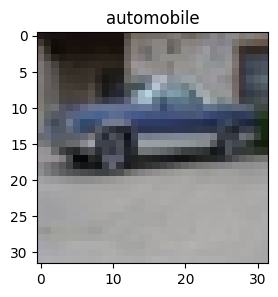

In [24]:
imageshow(10000)

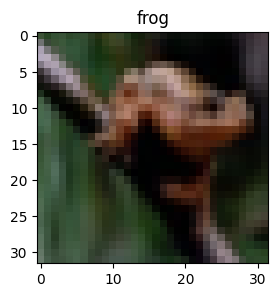

In [25]:
imageshow(5000)

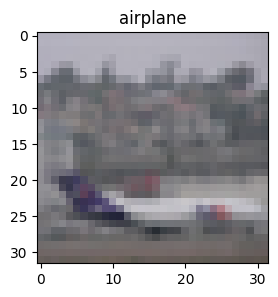

In [26]:
imageshow(30000)

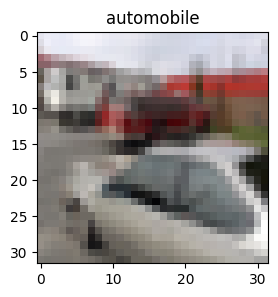

In [27]:
imageshow(49999)

### Data augmentation

In [28]:
from tensorflow.keras.utils import to_categorical

# Convert labels from integer (0-9) to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_train)

(50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [30]:
train_data = train_data.flow(x_train, y_train, batch_size=32)
test_data = test_data.flow(x_test, y_test, batch_size=32)

### preparing for callbacks

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

early_stopping = EarlyStopping(
    monitor='val_loss',    # Metric to monitor
    patience=5,            # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

tensorboard = TensorBoard(
    log_dir='logs/',       # Directory to save TensorBoard logs
    histogram_freq=1,      # Frequency (in epochs) at which to compute activation and weight histograms
    write_graph=True       # Whether to visualize the graph
)

In [32]:
callbacks_list = [
    early_stopping,
    tensorboard
]

### making model from scratch

In [33]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [34]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])

model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])

history = model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=20,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                    callbacks = callbacks_list )

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.2836 - loss: 1.9154 - val_accuracy: 0.5089 - val_loss: 1.3500
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.4782 - loss: 1.4511 - val_accuracy: 0.5647 - val_loss: 1.2411
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5369 - loss: 1.3106 - val_accuracy: 0.6098 - val_loss: 1.0879
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.5719 - loss: 1.2165 - val_accuracy: 0.6300 - val_loss: 1.0423
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6027 - loss: 1.1355 - val_accuracy: 0.6299 - val_loss: 1.0579
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.6179 - loss: 1.1042 - val_accuracy: 0.6355 - val_loss: 1.0305
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6323 - loss: 1.0555 - val_accuracy: 0.6557 - val_loss: 0.9688
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6385 - loss: 1.04

In [37]:
model.evaluate(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7401 - loss: 0.7681


[0.7660170197486877, 0.7355999946594238]

### making model using transfer learning(resnet)
this will show us the power of transfer learning and tell the without training not much of the parameters we can get good accuracy

In [38]:
import tensorflow_hub as hub

In [35]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [40]:
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(32,32,3)) # define the input image shape


# Wrap the hub layer in a Lambda layer
wrapped_feature_extractor = layers.Lambda(lambda x: feature_extractor_layer(x))

model = tf.keras.Sequential([
        wrapped_feature_extractor,
        layers.Dense(10, activation='softmax', name='output_layer')
    ])

In [41]:
model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet_history =  model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=20,
                            validation_data=test_data,
                            validation_steps=len(test_data),
                            callbacks = callbacks_list
                            )

Epoch 1/20
   7/1563 ━━━━━━━━━━━━━━━━━━━━ 8:57:02 21s/step - accuracy: 0.1264 - loss: 2.3814